Author: Krish

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "C:\\Users\\akl0407\\OneDrive - Northwestern University\\Back up\\2025-26\\Spring 2025\\STAT390\\LegalAid\\Data\\CAR_-_EP_Flow_Activity_Queue__Agent_Names\\"

In [3]:
folder = Path(data_path)
files = sorted(list(folder.glob("*.csv")) + list(folder.glob("*.xlsx")))
df_main = pd.DataFrame(columns=['Contact Session ID', 'EP Name', 'Flow Name', 'Activity Name', 'Activity Start Timestamp', 
                                'Queue Name', 'Agent Name', 'Termination Reason'])
df_main

,Contact Session ID,EP Name,Flow Name,Activity Name,Activity Start Timestamp,Queue Name,Agent Name,Termination Reason


In [4]:
i=0
for f in files:
    i = i + 1
    if f.suffix.lower() == ".csv":
        df = pd.read_csv(f, header=2, dtype=str, engine="python", skip_blank_lines=False)
    else:  # .xlsx
        df = pd.read_excel(f, sheet_name=0, header=2, dtype=str)
    df_main = pd.concat([df_main, df], ignore_index=True)
    print(i, f.stem, df.shape)

1 CAR - EP, Flow, Activity, Queue, & Agent Names (01-12-25 - 01-18-25) (52010, 7)
2 CAR - EP, Flow, Activity, Queue, & Agent Names (01-19-25 - 02-01-25) (95495, 7)
3 CAR - EP, Flow, Activity, Queue, & Agent Names (02-02-25 - 02-15-25) (90056, 7)
4 CAR - EP, Flow, Activity, Queue, & Agent Names (02-16-25 - 03-01-25) (88186, 7)
5 CAR - EP, Flow, Activity, Queue, & Agent Names (03-02-25 - 03-15-25) (86377, 7)
6 CAR - EP, Flow, Activity, Queue, & Agent Names (04-07-24 - 04-20-24) (88766, 7)
7 CAR - EP, Flow, Activity, Queue, & Agent Names (04-21-24 - 05-04-24) (89643, 7)
8 CAR - EP, Flow, Activity, Queue, & Agent Names (05-05-24 - 05-18-24) (82575, 7)
9 CAR - EP, Flow, Activity, Queue, & Agent Names (05-19-24 - 06-01-24) (71103, 7)
10 CAR - EP, Flow, Activity, Queue, & Agent Names (06-02-24 - 06-15-24) (84354, 7)
11 CAR - EP, Flow, Activity, Queue, & Agent Names (06-16-24 - 06-29-24) (82124, 7)
12 CAR - EP, Flow, Activity, Queue, & Agent Names (06-30-24 - 07-13-24) (79752, 7)
13 CAR - EP, 

In [5]:
df_main["Activity Start Timestamp"] = df_main["Activity Start Timestamp"].apply(
    lambda x: datetime.strptime(x, "%Y/%m/%d %I:%M:%S %p"))

In [11]:
df_main.shape

(3222287, 9)

In [12]:
df_main.dtypes

Contact Session ID                  object
EP Name                             object
Flow Name                           object
Activity Name                       object
Activity Start Timestamp    datetime64[ns]
Queue Name                          object
Agent Name                          object
Termination Reason                  object
hour                                 int32
dtype: object

In [13]:
df_main["hour"] = df_main["Activity Start Timestamp"].dt.hour

In [14]:
df_main.sort_values(by = ['Contact Session ID', 'Activity Start Timestamp'], inplace=True)

In [15]:
first_call_leg = df_main.groupby('Contact Session ID').first().reset_index()

In [17]:
first_call_leg.head()

,Contact Session ID,EP Name,Flow Name,Activity Name,Activity Start Timestamp,Queue Name,Agent Name,Termination Reason,hour
0,00002422-f51f-458b-82d6-cfa5a3f36fd9,Main Number Telephony EP,LACMain,LanguageSelectionMenu,2025-03-13 12:51:21,Staff Directory English Transfer,CBT Agent,None,12
1,0000a8d5-cecb-46b1-82cf-b7ce07d85b24,Main Number Telephony EP,LACMain,LanguageSelectionMenu,2025-03-17 16:53:15,None,None,Customer Left,16
2,00011655-35de-476f-9a8c-dd48ed4d914a,Main Number Telephony EP,LACMain,LanguageSelectionMenu,2024-11-06 14:39:01,Front Desk Transfer,CBT Agent,None,14
3,00014a58-a6ce-4cb2-a529-d55e2c9c304d,Main Number Telephony EP,LACMain,LanguageSelectionMenu,2025-02-28 08:33:40,None,None,None,8
4,00015327-f646-462f-a585-0552331eed4e,Main Number Telephony EP,LACMain,LanguageSelectionMenu,2025-06-03 07:43:56,None,None,Customer Left,7


In [18]:
from datetime import date
first_call_leg_may24_aug35 = first_call_leg.loc[(first_call_leg['Activity Start Timestamp'].dt.date >= date(2024,5,1)) \
& (first_call_leg['Activity Start Timestamp'].dt.date <= date(2025,8,31)),:]

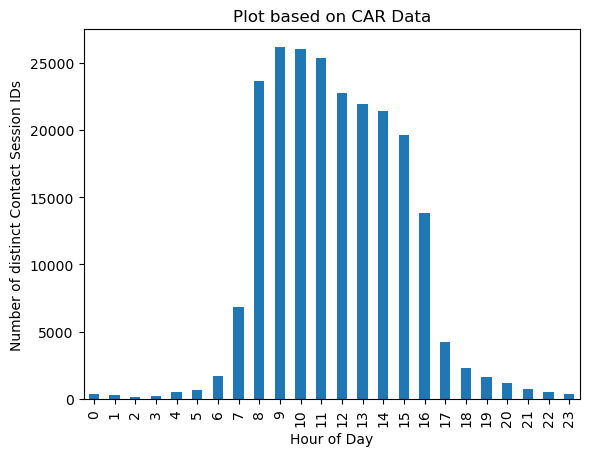

In [19]:
counts = first_call_leg_may24_aug35['hour'].value_counts().sort_index()
counts.plot(kind = 'bar')
plt.xlabel("Hour of Day")
plt.ylabel("Number of distinct Contact Session IDs");
plt.title("Plot based on CAR Data");

In [21]:
first_call_leg_may24_aug35.shape

(222284, 9)

In [22]:
df_main.shape[0]/240592

13.393159373545256

In [23]:
df_main['Activity Start Timestamp'].max()

Timestamp('2025-09-13 22:52:02')

In [24]:
df_main['Activity Start Timestamp'].min()

Timestamp('2024-04-07 00:32:12')

In [25]:
df_main.hour.value_counts().sort_index()

hour
0       2928
1       1980
2       3005
3       1835
4       3633
5       8674
6      12712
7      55952
8     448484
9     410588
10    390286
11    373629
12    332668
13    319602
14    307205
15    280207
16    173231
17     37838
18     19564
19     13203
20     10131
21      6119
22      4100
23      4713
Name: count, dtype: int64

In [26]:
df_main.columns

Index(['Contact Session ID', 'EP Name', 'Flow Name', 'Activity Name',
       'Activity Start Timestamp', 'Queue Name', 'Agent Name',
       'Termination Reason', 'hour'],
      dtype='object')

In [27]:
df_main['Termination Reason'].value_counts().sum()

100373

In [28]:
df_main['Termination Reason'].value_counts()

Termination Reason
Customer Left                       79194
Agent Left                          12154
System disconnected the contact      4541
NO_ANSWER_FROM_AGENT                 1007
RONA_TIMER_EXPIRED                    776
Queue Timeout                         670
NO_ANSWER_FROM_CUSTOMER               573
RONA Timer Expired                    460
AGENT_ENDS                            257
CUSTOMER_UNAVAILABLE                  223
System Error                          162
CUSTOMER_BUSY                         112
USER_UNAVAILABLE                       63
NO_ANSWER_USER                         46
USER_BUSY                              30
MEDIA_MANAGER_INTERNAL_ERROR           30
AGENT_UNAVAILABLE                      19
MAX_CALLBACK_RETRY_LIMIT_REACHED       19
AGENT_BUSY                             19
USER_DECLINED                           9
Participant Invite timer expired        4
CONTACT_CALLBACK_IN_PROGRESS            2
OUTDIAL_FAILED                          1
CHANNEL_FAILURE

In [55]:
df_main['Activity Start Timestamp'].dt.date >= date(2025,3,16)

401227     False
401228     False
401229     False
401230     False
401236     False
           ...  
1458735    False
1458736    False
1458737    False
1458738    False
1458739    False
Name: Activity Start Timestamp, Length: 3222287, dtype: bool

In [56]:
df_main_new_data = df_main.loc[df_main['Activity Start Timestamp'].dt.date >= date(2025,3,16),:]

In [57]:
df_main_new_data['Contact Session ID'].nunique()

83090

In [59]:
df_main_new_data.groupby('Contact Session ID')['Termination Reason'].nunique().sort_values()

Contact Session ID
0000a8d5-cecb-46b1-82cf-b7ce07d85b24    1
a9990d27-e860-4088-b9a5-634c1280c46a    1
a998d1e0-53b9-4c37-a8ba-0a5bda68157a    1
a9985de8-3344-4ddb-9f01-8d008cf7bb7f    1
a997d2cf-e569-4274-a252-cae890d77790    1
                                       ..
21c39a18-e5fe-421e-b2e6-39428f481226    5
37e46c47-1a4f-4406-a177-f412ab4fe43b    5
fa4b154d-1215-4019-8a11-538f6ac994c0    5
a17a92b3-abd0-49dc-a0e2-ddc2e86fe511    6
0b581d44-53d2-4276-87dd-7afcfd4f5248    6
Name: Termination Reason, Length: 83090, dtype: int64

In [61]:
df_main.loc[df_main['Contact Session ID'] == '0b581d44-53d2-4276-87dd-7afcfd4f5248',:].to_csv('temp_export.csv')

In [38]:
df_main.loc[df_main['Contact Session ID'] == '000a3bc0-45e5-49e5-8bda-3f2141b2bc38',:].to_csv('agent_left2.csv')

In [67]:
df_main.loc[df_main['Contact Session ID'] == '0008d9f3-db30-4cd9-baf1-71baffba9643',:].to_csv('temp_export.csv')

In [65]:
df_main.loc[df_main['Contact Session ID'] == '0008d9f3-db30-4cd9-baf1-71baffba9643',:]

,Contact Session ID,EP Name,Flow Name,Activity Name,Activity Start Timestamp,Queue Name,Agent Name,Termination Reason,hour
2167449,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,NaN,NaN,2025-04-14 08:49:02,NaN,NaN,NaN,8
2167450,0008d9f3-db30-4cd9-baf1-71baffba9643,NaN,LACMain,NaN,2025-04-14 08:49:02,NaN,NaN,NaN,8
2167451,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,NaN,LanguageSelectionMenu,2025-04-14 08:49:02,NaN,NaN,NaN,8
2167452,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,LACMain,NaN,2025-04-14 08:49:03,NaN,NaN,NaN,8
2167459,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,NaN,MainMenu,2025-04-14 08:49:14,NaN,NaN,NaN,8
2167472,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,NaN,HelpWithLegalorOtherReasonMenu,2025-04-14 08:50:08,NaN,NaN,NaN,8
2167476,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,NaN,MainMenu,2025-04-14 08:50:18,NaN,NaN,NaN,8
2167477,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,NaN,StaffDirectoryEnglishTransfer,2025-04-14 08:50:19,NaN,NaN,NaN,8
2167478,0008d9f3-db30-4cd9-baf1-71baffba9643,NaN,NaN,NaN,2025-04-14 08:50:19,Staff Directory English Transfer,NaN,NaN,8
2167479,0008d9f3-db30-4cd9-baf1-71baffba9643,Main Number Telephony EP,NaN,NaN,2025-04-14 08:50:19,NaN,NaN,NaN,8


In [31]:
agent_left_rows = df_main.loc[df_main['Termination Reason'] == 'Agent Left',:]

In [68]:
cust_left_rows = df_main.loc[df_main['Termination Reason'] == 'Customer Left',:]
cust_left_rows.to_csv('temp_export.csv')

In [71]:
cust_left_journeys = df_main.loc[df_main['Contact Session ID'].isin(cust_left_rows['Contact Session ID']),:]
cust_left_journeys.to_csv('temp_export.csv')

In [32]:
agent_left_rows

,Contact Session ID,EP Name,Flow Name,Activity Name,Activity Start Timestamp,Queue Name,Agent Name,Termination Reason,hour
2694227,000a3bc0-45e5-49e5-8bda-3f2141b2bc38,Intake Outdial EP,NaN,NaN,2025-06-10 10:41:44,Intake Outdial Queue,NaN,Agent Left,10
2226960,000d510a-4f5d-4ca4-9c05-9db918d11fe3,Legal Menu Telephony EP,NaN,NaN,2025-04-22 15:23:39,Criminal Records Voicemail Transfer,CBT Agent,Agent Left,15
2584043,000f7898-6a8d-4604-a9e9-d5e6aeb17670,Main Number Telephony EP,NaN,NaN,2025-06-18 16:01:57,Staff Directory English Transfer,CBT Agent,Agent Left,16
2210885,0016a2d9-87a1-43a8-880f-5ae4d1ae726d,Legal Menu Telephony EP,NaN,NaN,2025-04-21 10:34:23,Criminal Records Voicemail Transfer,CBT Agent,Agent Left,10
2793862,001741db-98b4-409f-8646-32ed0ecf6331,Courtesy Callback Telephony EP,NaN,NaN,2025-07-23 09:21:39,Benefits,NaN,Agent Left,9
...,...,...,...,...,...,...,...,...,...
3207738,ffef5316-dfc9-4d55-ba63-65461530a4ed,Legal Menu Telephony EP,NaN,NaN,2025-03-27 08:53:35,Criminal Records Voicemail Transfer,CBT Agent,Agent Left,8
3068862,ffefc12e-471f-4841-b7ca-e7641323d3b8,Main Number Telephony EP,NaN,NaN,2025-08-06 10:18:45,Staff Directory Spanish Transfer,CBT Agent,Agent Left,10
3150014,fff24560-c573-46b8-ad2b-d82fe73399eb,Main Number Telephony EP,NaN,NaN,2025-09-10 08:31:48,Staff Directory English Transfer,CBT Agent,Agent Left,8
3153057,fff5ca16-2e1f-4c70-9361-a4ab4bcab275,Closed Queue Menu Telephony EP,NaN,NaN,2025-09-10 11:23:57,Clinic Voicemail Transfer,CBT Agent,Agent Left,11


In [53]:
df_main.loc[df_main['Contact Session ID'] == '0029a1f0-56ed-47a8-b35f-6460a709c544',:].to_csv('temp_export.csv')

In [ ]:
df_main.loc[df_main['Contact Session ID'] == '0029a1f0-56ed-47a8-b35f-6460a709c544',:]

In [29]:
sys_discon_rows = df_main.loc[df_main['Termination Reason'] == 'System disconnected the contact',:]
sys_discon_rows

,Contact Session ID,EP Name,Flow Name,Activity Name,Activity Start Timestamp,Queue Name,Agent Name,Termination Reason,hour
2585014,00189604-35e3-42ed-8187-e46fdf1f0bb4,Closed Hours-Holidays Menu Telephony EP,NaN,NaN,2025-06-19 08:30:42,NaN,NaN,System disconnected the contact,8
2278015,001d4ba0-a384-4c4b-ae8a-bdda3e1119dc,Closed Queue Menu Telephony EP,NaN,NaN,2025-04-30 11:42:02,NaN,NaN,System disconnected the contact,11
2405521,0029a1f0-56ed-47a8-b35f-6460a709c544,Pre-Legal Menu Seniors Menu Telephony EP,NaN,NaN,2025-05-20 14:58:12,NaN,NaN,System disconnected the contact,14
2800105,00306e56-e09a-4c55-946d-1964145899cf,Closed Hours-Holidays Menu Telephony EP,NaN,NaN,2025-07-23 16:33:11,NaN,NaN,System disconnected the contact,16
2800106,00306e56-e09a-4c55-946d-1964145899cf,Closed Hours-Holidays Menu Telephony EP,NaN,NaN,2025-07-23 16:33:11,NaN,NaN,System disconnected the contact,16
...,...,...,...,...,...,...,...,...,...
2140432,ffa9598d-640c-44e1-b470-ca7d6fa97f1e,Closed Hours-Holidays Menu Telephony EP,NaN,NaN,2025-04-02 07:59:52,NaN,NaN,System disconnected the contact,7
2246157,ffac6974-cf1f-4f3d-9ad5-8a9c3a53a484,Closed Hours-Holidays Menu Telephony EP,NaN,NaN,2025-04-25 07:33:10,NaN,NaN,System disconnected the contact,7
2246158,ffac6974-cf1f-4f3d-9ad5-8a9c3a53a484,Closed Hours-Holidays Menu Telephony EP,NaN,NaN,2025-04-25 07:33:10,NaN,NaN,System disconnected the contact,7
2166291,ffcee247-5ceb-49dc-aed6-ccc99aa08975,Closed Hours-Holidays Menu Telephony EP,NaN,NaN,2025-04-13 22:40:19,NaN,NaN,System disconnected the contact,22


In [40]:
df_main.loc[df_main['Contact Session ID'] == '0002606f-910e-43e5-aac5-d93fefc1cead',:]

,Contact Session ID,EP Name,Flow Name,Activity Name,Activity Start Timestamp,Queue Name,Agent Name,Termination Reason,hour
2535854,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,NaN,NaN,2025-06-04 10:18:06,NaN,NaN,NaN,10
2535855,0002606f-910e-43e5-aac5-d93fefc1cead,NaN,LACMain,NaN,2025-06-04 10:18:06,NaN,NaN,NaN,10
2535856,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,NaN,LanguageSelectionMenu,2025-06-04 10:18:06,NaN,NaN,NaN,10
2535857,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,LACMain,NaN,2025-06-04 10:18:06,NaN,NaN,NaN,10
2535865,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,NaN,LanguageSelectionMenu,2025-06-04 10:18:24,NaN,NaN,NaN,10
2535880,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,NaN,FrontDeskTransfer1,2025-06-04 10:18:42,NaN,NaN,NaN,10
2535881,0002606f-910e-43e5-aac5-d93fefc1cead,NaN,NaN,NaN,2025-06-04 10:18:42,Front Desk Transfer,NaN,NaN,10
2535882,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,NaN,NaN,2025-06-04 10:18:42,NaN,NaN,NaN,10
2535883,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,NaN,NaN,2025-06-04 10:18:42,Front Desk Transfer,CBT Agent,NaN,10
2535884,0002606f-910e-43e5-aac5-d93fefc1cead,Main Number Telephony EP,NaN,NaN,2025-06-04 10:18:45,Front Desk Transfer,CBT Agent,NaN,10


In [63]:
cust_left_rows['EP Name'].value_counts()

EP Name
Main Number Telephony EP                    26269
Closed Queue Menu Telephony EP              16365
Courtesy Callback Telephony EP               9172
Legal Menu Telephony EP                      5738
Other Legal Menu Telephony EP                4534
Closed Hours-Holidays Menu Telephony EP      4366
Farmworker Main Number Telephony EP          4118
Legal Housing Menu Telephony EP              1955
Legal Family Menu Telephony EP               1507
Pre-Legal Menu Seniors Menu Telephony EP     1166
All LAC Queues Telephony EP                  1148
Legal HIV Menu Telephony EP                   527
Intake Outdial EP                             501
Legal Immigration Menu Telephony EP           267
Legal Benefits Menu Telephony EP              152
Legal Employment Menu Telephony EP             78
Name: count, dtype: int64

In [51]:
sys_discon_rows['EP Name'].value_counts()

EP Name
Closed Hours-Holidays Menu Telephony EP     3370
Closed Queue Menu Telephony EP               862
Pre-Legal Menu Seniors Menu Telephony EP     309
Name: count, dtype: int64

In [26]:
df_main['Activity Start Timestamp'].max()

Timestamp('2025-09-13 22:52:02')

In [25]:
cust_left_rows['Activity Start Timestamp'].max()

Timestamp('2025-09-13 22:52:02')

In [33]:
agent_left_rows['EP Name'].value_counts()

EP Name
Main Number Telephony EP                   5591
Courtesy Callback Telephony EP             2443
Intake Outdial EP                          2299
Legal Menu Telephony EP                     761
Closed Queue Menu Telephony EP              360
Closed Hours-Holidays Menu Telephony EP     278
All LAC Queues Telephony EP                 160
Other Legal Menu Telephony EP               120
Legal Family Menu Telephony EP              101
Legal Housing Menu Telephony EP              37
Legal Benefits Menu Telephony EP              2
Legal HIV Menu Telephony EP                   1
Legal Immigration Menu Telephony EP           1
Name: count, dtype: int64

In [23]:
cust_left_rows['EP Name'].value_counts()

EP Name
Main Number Telephony EP                    26269
Closed Queue Menu Telephony EP              16365
Courtesy Callback Telephony EP               9172
Legal Menu Telephony EP                      5738
Other Legal Menu Telephony EP                4534
Closed Hours-Holidays Menu Telephony EP      4366
Farmworker Main Number Telephony EP          4118
Legal Housing Menu Telephony EP              1955
Legal Family Menu Telephony EP               1507
Pre-Legal Menu Seniors Menu Telephony EP     1166
All LAC Queues Telephony EP                  1148
Legal HIV Menu Telephony EP                   527
Intake Outdial EP                             501
Legal Immigration Menu Telephony EP           267
Legal Benefits Menu Telephony EP              152
Legal Employment Menu Telephony EP             78
Name: count, dtype: int64

In [158]:
call_duration = df_main.groupby('Contact Session ID')['Activity Start Timestamp'].agg(start = "first", end = "last").reset_index()
call_duration['duration'] = call_duration['end'] - call_duration['start']

In [161]:
call_duration.sort_values(by = 'duration', ascending= False)

,Contact Session ID,start,end,duration
22827,18258e65-a064-475c-842e-85e6b4a2f029,2024-06-11 08:27:04,2024-06-17 09:23:02,6 days 00:55:58
82684,57d5b0b0-6b44-4f0a-9914-8da87ac68917,2024-06-12 08:21:39,2024-06-18 09:17:27,6 days 00:55:48
174367,b9907df9-d897-42f4-8ef1-e125997dbc7d,2024-06-11 08:29:09,2024-06-17 09:23:16,6 days 00:54:07
64040,4419b8ca-41a8-4329-acac-09860c88343f,2024-06-12 08:29:41,2024-06-18 09:23:27,6 days 00:53:46
13699,0e7b020b-eb98-4764-9a7b-41e25cedc458,2024-06-12 08:15:54,2024-06-18 09:09:33,6 days 00:53:39
...,...,...,...,...
141410,96638c94-a051-4a99-8164-67e37794e822,2025-01-10 07:07:47,2025-01-10 07:07:47,0 days 00:00:00
112246,77664266-2f5b-4f23-b916-4536804ae127,2024-09-06 19:59:32,2024-09-06 19:59:32,0 days 00:00:00
75451,503b00ac-75ff-4663-8fd7-354b5dbe69af,2024-08-21 12:25:57,2024-08-21 12:25:57,0 days 00:00:00
112249,7766cf4c-8a95-446d-8435-6668a0e16937,2025-06-13 10:04:22,2025-06-13 10:04:22,0 days 00:00:00


In [34]:
df_main.shape

(3222287, 9)

In [38]:
df_main.to_csv('C:/Users/akl0407/OneDrive - Northwestern University/Back up/2025-26/Fall 2025/LegalAid/car_appended.csv', index=False)

In [36]:
pwd

'C:\\Users\\akl0407\\Desktop\\Academia\\GitHub\\STAT390_LegalAid_Fall2025\\Internal work of Teams\\Krish'